# Load the dataset into a data frame using Python

In [3]:
import pandas as pd

file_path = 'C:/Users/abdel/Downloads/Video games.csv'

df = pd.read_csv(file_path)

print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


# Clean the data

In [4]:
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [5]:
df = df.dropna()

In [6]:
print(df.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [ ]:
df = df.drop_duplicates()

# Create an area chart to show the trend of global sales over the years

In [7]:
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

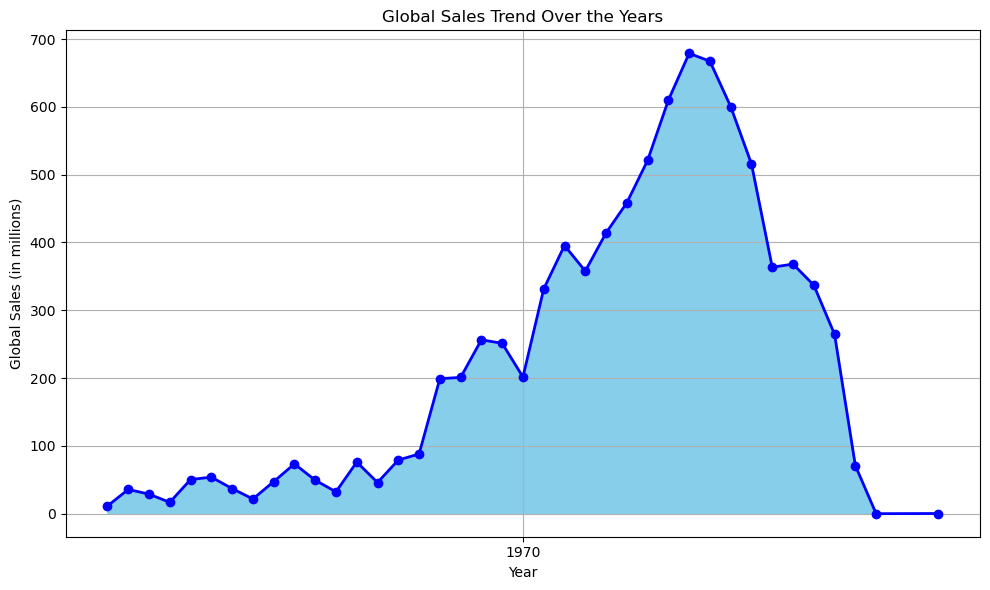

In [11]:
import matplotlib.pyplot as plt

sales_by_year = df.groupby('Year')['Global_Sales'].sum()

# Create an area chart
plt.figure(figsize=(10, 6))
plt.fill_between(sales_by_year.index, sales_by_year, color='skyblue')
plt.plot(sales_by_year.index, sales_by_year, color='blue', marker='o', linestyle='-', linewidth=2)

# Customize the chart
plt.title('Global Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Create a histogram to show the distribution of global sales

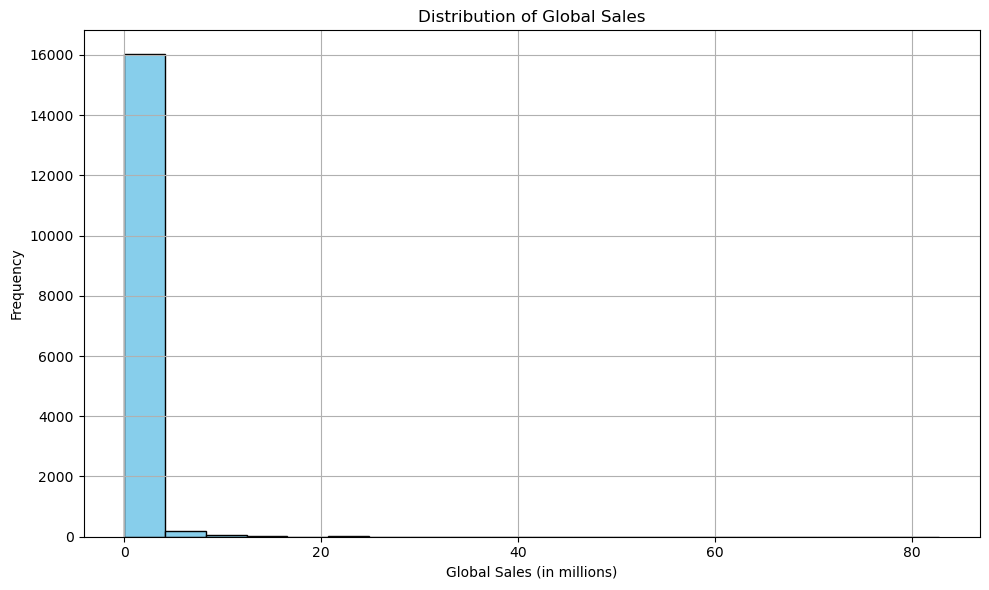

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Global_Sales'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show()

# Create a scatter plot to show the relationship between North American sales and European sales

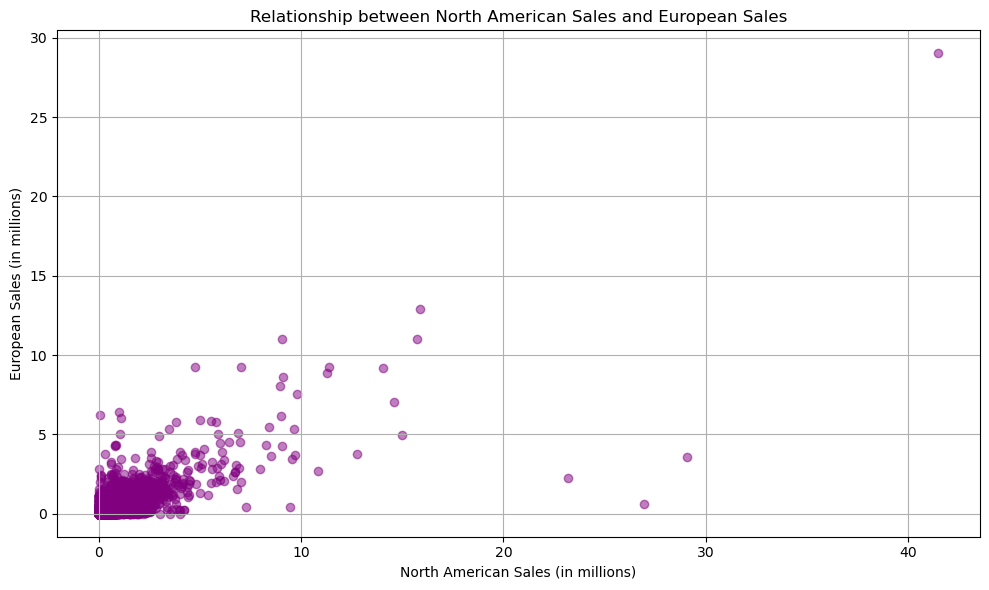

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['NA_Sales'], df['EU_Sales'], color='purple', alpha=0.5)

plt.title('Relationship between North American Sales and European Sales')
plt.xlabel('North American Sales (in millions)')
plt.ylabel('European Sales (in millions)')
plt.grid(True)
plt.tight_layout()

plt.show()

# Create a scatter plot to show the relationship between Japanese sales and Other sales

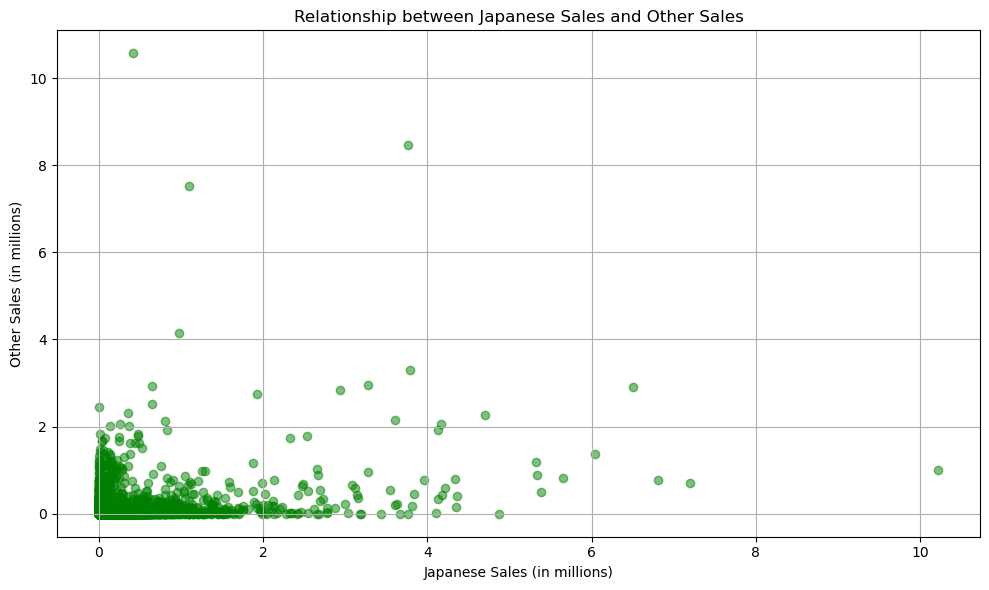

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['JP_Sales'], df['Other_Sales'], color='green', alpha=0.5)

plt.title('Relationship between Japanese Sales and Other Sales')
plt.xlabel('Japanese Sales (in millions)')
plt.ylabel('Other Sales (in millions)')
plt.grid(True)
plt.tight_layout()

plt.show()

# Create a stacked area chart to show the distribution of sales by platform over the years

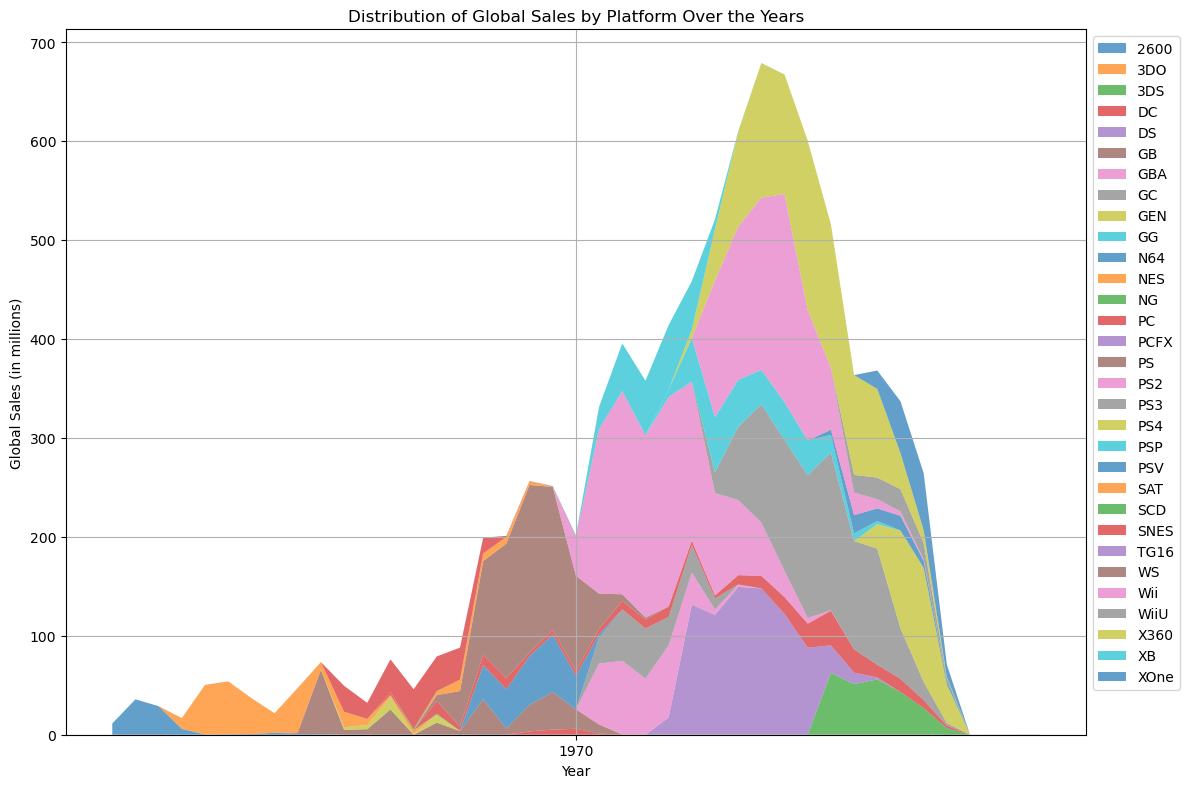

In [16]:
pivot_df = df.pivot_table(index='Year', columns='Platform', values='Global_Sales', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
plt.stackplot(pivot_df.index, pivot_df.values.T, labels=pivot_df.columns, alpha=0.7)

plt.title('Distribution of Global Sales by Platform Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.show()

# Create a bar chart to show the top 10 publishers by global sales

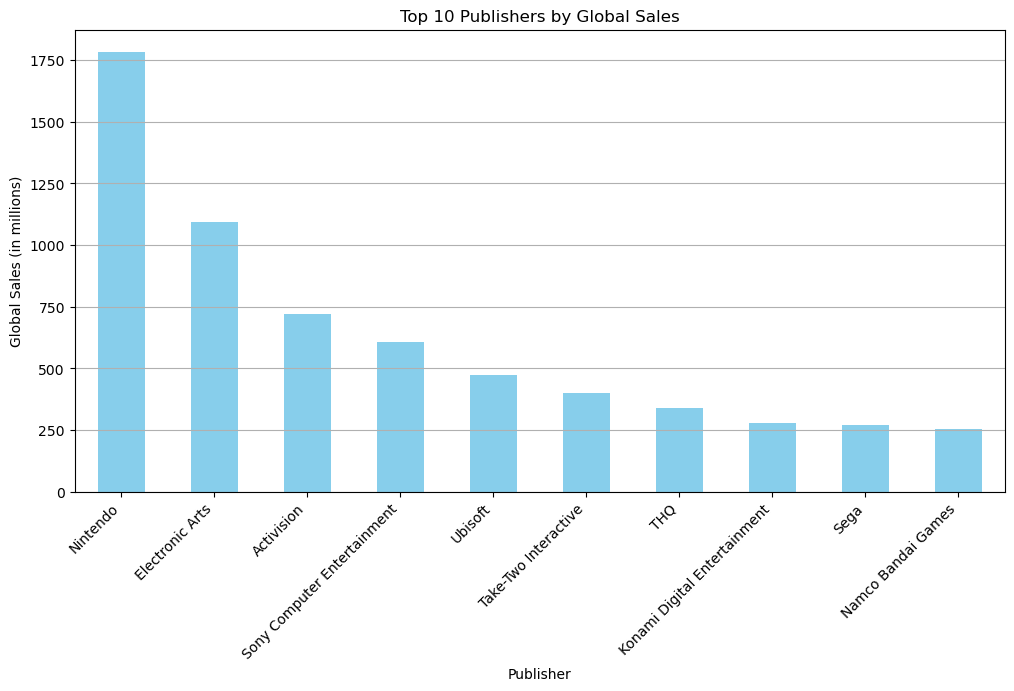

In [17]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar', color='skyblue')

plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()

# Create a pie chart to show the distribution of genres by global sales

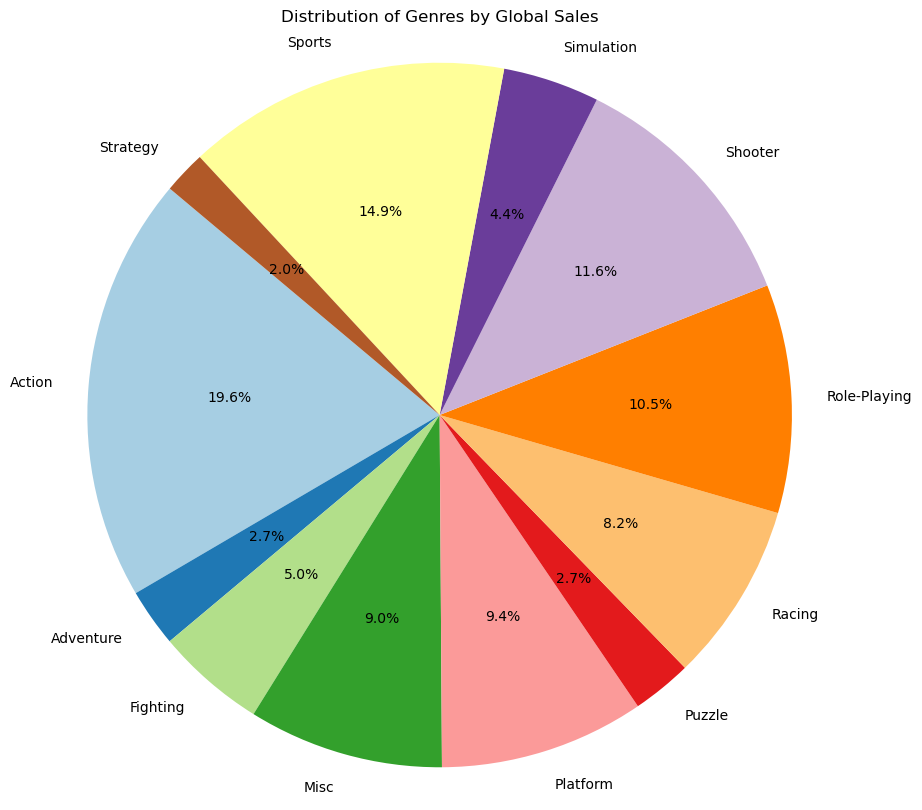

In [18]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum()

plt.figure(figsize=(10, 10))
plt.pie(genre_sales, labels=genre_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Distribution of Genres by Global Sales')
plt.axis('equal')

plt.show()